In [1]:
from tensorflow import keras
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [2]:
df = pd.read_csv("../ML/data/boston.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

- 보스턴 집값 데이터 독립변수
    - CRIM : 인구 1명당 범죄 발생 수
    - ZN : 25,000 평방 피트 이상의 주거 구역 비중
    - INDUS : 소매업 외 상업이 차지하는 면적 비율
    - CHAS : 찰스강 위치 변수(1 : 강 주변, 0 : 이외)
    - NOX : 일산화질소 농도
    - RM : 집의 평균 방 수
    - AGE : 1940년 이전에 지어진 비율
    - DIS : 5가지 보스턴시 고용 시설까지의 거리
    - RAD : 순환고속도로의 접근 용이성
    - TAX : $10,000당 부동산 세율 총계
    - PTRATIO : 지역별 학생과 교사 비율
    - B : 지역별 흑인 비율
    - LSTAT : 급여가 낮은 직업에 종사하는 인구 비율(%)
    
- 종속변수
    - PRICE : 가격(단위 : $1,000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
rs = RobustScaler()

<Axes: >

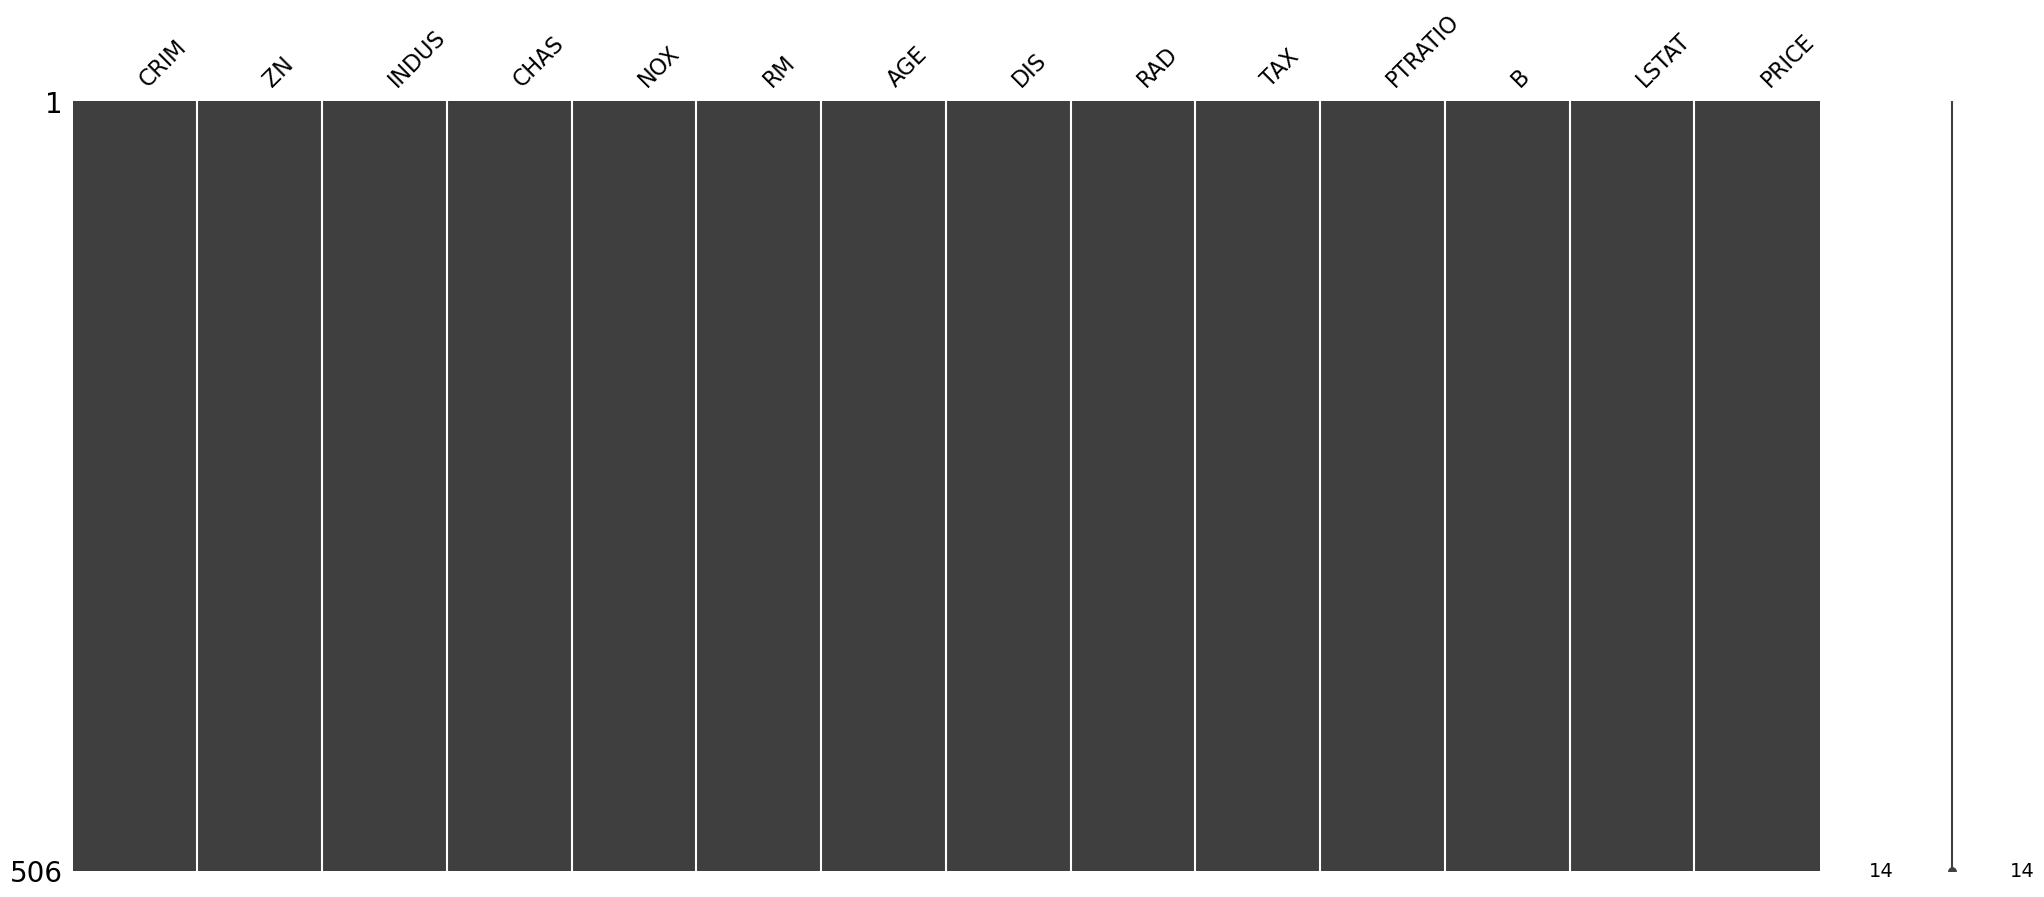

In [9]:
# 결측치 시각화
msno.matrix(df)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [12]:
# 스케일링
scaled_sub = rs.fit_transform(x_sub)
scaled_val = rs.transform(x_val)
scaled_test = rs.transform(x_test)

In [13]:
scaled_sub.shape

(323, 13)

In [14]:
# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = "relu", input_shape = (13,)))
model.add(keras.layers.Dense(10, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "linear"))
model.compile(optimizer = "adam", loss = "mean_squared_error")
history = model.fit(scaled_sub, y_sub, epochs = 150, validation_data = (scaled_val, y_val))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 583.0919 - val_loss: 608.5864
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 569.3051 - val_loss: 590.4200
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 541.5990 - val_loss: 569.1564
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 540.1071 - val_loss: 542.9454
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 488.3124 - val_loss: 512.6046
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 450.0702 - val_loss: 478.6227
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 414.4371 - val_loss: 442.1829
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 384.6001 - val_loss: 402.0810
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 356.2422 - val_loss: 358.2364
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 300.1143 - val_loss: 311.5904
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 264.2384 - val_loss: 265.3978
Epoch 12/15

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2650 - val_loss: 11.7807
Epoch 68/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6870 - val_loss: 11.8120
Epoch 69/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9837 - val_loss: 11.6689
Epoch 70/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5328 - val_loss: 11.5215
Epoch 71/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8586 - val_loss: 11.5036
Epoch 72/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0544 - val_loss: 11.5103
Epoch 73/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.0407 - val_loss: 11.5086
Epoch 74/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.2639 - val_loss: 11.4536
Epoch 75/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4130 - val_loss: 11.4609
Epoch 76/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1537 - val_loss: 11.4864
Epoch 77/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.3393 - val_loss: 11.4384
Epoch 78/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6463 - val_loss: 11.2398
Epoch 135/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2537 - val_loss: 11.2998
Epoch 136/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0344 - val_loss: 11.3435
Epoch 137/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.1609 - val_loss: 11.1211
Epoch 138/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.0480 - val_loss: 10.9981
Epoch 139/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.7267 - val_loss: 11.2183
Epoch 140/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0590 - val_loss: 11.3863
Epoch 141/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2280 - val_loss: 11.4596
Epoch 142/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.5104 - val_loss: 11.4229
Epoch 143/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7094 - val_loss: 11.3267
Epoch 144/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5417 - val_loss: 10.8680
Epoch 145/150
11/11 ━━━━━━━━━━━━━━━━━

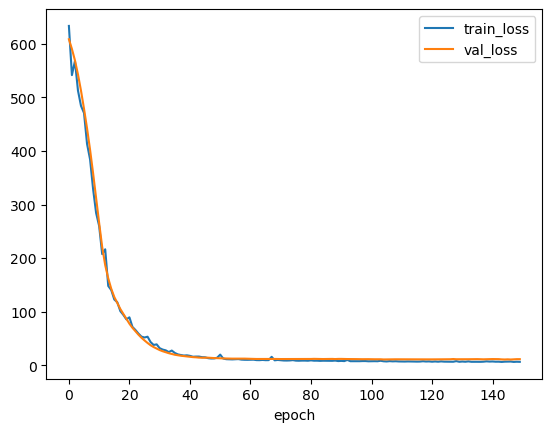

In [15]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 설계

In [16]:
model = keras.Sequential()

In [19]:
# 은닉층1
model.add(keras.layers.Dense(30, activation = "relu", input_shape = (13,)))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# 은닉층2
model.add(keras.layers.Dense(6, activation = "relu"))

In [22]:
# 출력층
model.add(keras.layers.Dense(1))

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 16, restore_best_weights = True)

In [24]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mae"])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 30)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             186 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 613 (2.39 KB)

 Trainable params: 613 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(x_sub, y_sub, epochs = 200, validation_data = (x_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 25113.6133 - mae: 152.6935 - val_loss: 13609.2764 - val_mae: 113.1654
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11650.9814 - mae: 103.9370 - val_loss: 5372.8560 - val_mae: 70.2609
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4296.8569 - mae: 62.0123 - val_loss: 1484.9420 - val_mae: 35.6213
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1139.3506 - mae: 30.9987 - val_loss: 525.8329 - val_mae: 20.2541
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 444.2010 - mae: 17.8736 - val_loss: 206.4144 - val_mae: 10.9387
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 159.9175 - mae: 9.5758 - val_loss: 113.1835 - val_mae: 7.5202
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 104.9670 - mae: 7.8747 - val_loss: 95.8232 - val_mae: 7.2921
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.5306 - mae: 7.8034 - val_loss: 94.1136 - val_mae: 7.3998
Epoch 9/20

Epoch 54/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.2245 - mae: 5.2790 - val_loss: 69.6117 - val_mae: 5.2477
Epoch 55/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.4197 - mae: 5.5730 - val_loss: 67.7347 - val_mae: 5.2595
Epoch 56/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.6541 - mae: 5.2980 - val_loss: 68.2425 - val_mae: 5.2220
Epoch 57/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.7038 - mae: 5.4473 - val_loss: 68.8627 - val_mae: 5.2142
Epoch 58/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 57.7649 - mae: 5.6787 - val_loss: 68.3699 - val_mae: 5.2165
Epoch 59/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 59.1001 - mae: 5.5342 - val_loss: 67.3965 - val_mae: 5.2360
Epoch 60/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.9316 - mae: 5.3900 - val_loss: 66.8083 - val_mae: 5.2583
Epoch 61/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 47.3567 - mae: 5.0872 - val_loss: 67.4296 - val_mae: 5.2153
Epoch 62/200
11/11 ━━━━━━━━━━━━━━━━━━

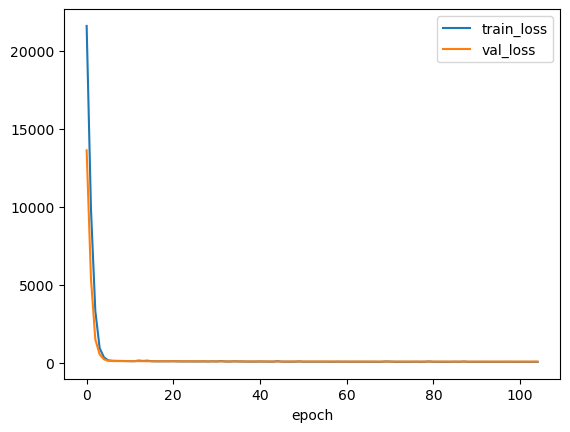

In [27]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 성능 평가

In [28]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.0419 - mae: 5.9602 


[63.47761154174805, 5.981199264526367]

In [29]:
model.predict(x_test.iloc[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[20.669567]], dtype=float32)

In [30]:
y_test.iloc[[0]]

329    22.6
Name: PRICE, dtype: float64

In [32]:
y_pred = model.predict(x_test).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [34]:
for i in range(10):
    label = y_test.iloc[i]
    prediction = y_pred[i]
    print(f"실제가격 {label:.3f}, 예상가격 : {prediction:.3f}")

실제가격 22.600, 예상가격 : 20.670
실제가격 50.000, 예상가격 : 21.545
실제가격 23.000, 예상가격 : 28.235
실제가격 8.300, 예상가격 : 18.318
실제가격 21.200, 예상가격 : 20.199
실제가격 19.900, 예상가격 : 24.548
실제가격 20.600, 예상가격 : 23.630
실제가격 18.700, 예상가격 : 25.488
실제가격 16.100, 예상가격 : 18.449
실제가격 18.600, 예상가격 : 5.731
